In [4]:
# importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# displaying all rows and columns:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

#for ignoring warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# importing ipl dataset:
df=pd.read_csv(r"C:\Users\Vishal\Web Deployment\IPL Score Prediction\data\exported_data\EncodedData.csv",index_col=0,header=0)
print(df.shape)
df.head(10)

(40108, 10)


,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,13,3,6,61,0,5.1,59,0,222
33,2008-04-18,13,3,6,61,1,5.2,59,1,222
34,2008-04-18,13,3,6,61,1,5.3,59,1,222
35,2008-04-18,13,3,6,61,1,5.4,59,1,222
36,2008-04-18,13,3,6,61,1,5.5,58,1,222
37,2008-04-18,13,3,6,61,1,5.6,58,1,222
38,2008-04-18,13,3,6,62,1,6.1,55,1,222
39,2008-04-18,13,3,6,63,1,6.2,52,1,222
40,2008-04-18,13,3,6,64,1,6.3,47,1,222
41,2008-04-18,13,3,6,66,1,6.4,45,1,222


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   venue           40108 non-null  int64  
 2   bat_team        40108 non-null  int64  
 3   bowl_team       40108 non-null  int64  
 4   runs            40108 non-null  int64  
 5   wickets         40108 non-null  int64  
 6   overs           40108 non-null  float64
 7   runs_last_5     40108 non-null  int64  
 8   wickets_last_5  40108 non-null  int64  
 9   total           40108 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 3.4+ MB


In [7]:
#Converting the column 'date' from string to datetime object:  
df['date']=pd.to_datetime(df['date'])

In [8]:
train=df[df['date']<'2017-01-01']
test=df[df['date']>='2017-01-01']

In [9]:
print(train.shape)
print(test.shape)

(37330, 10)
(2778, 10)


In [10]:
#Dropping 'date'columns from train and test
train=train.drop('date',axis=1)
test=test.drop('date',axis=1)

In [11]:
print(train.shape)
print(test.shape)

(37330, 9)
(2778, 9)


In [12]:
train.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,13,3,6,61,0,5.1,59,0,222
33,13,3,6,61,1,5.2,59,1,222
34,13,3,6,61,1,5.3,59,1,222
35,13,3,6,61,1,5.4,59,1,222
36,13,3,6,61,1,5.5,58,1,222


In [13]:
test.head()

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
68894,21,7,6,46,1,5.1,42,1,207
68895,21,7,6,50,1,5.2,46,1,207
68896,21,7,6,50,1,5.3,44,1,207
68897,21,7,6,54,1,5.4,48,1,207
68898,21,7,6,58,1,5.5,51,1,207


In [14]:
#Futher Splitting data into X_train,X_test,Y_train,Y_test:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [15]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(37330, 8)
(37330,)
(2778, 8)
(2778,)


In [16]:
X=df.iloc[:,0:-1]
Y=df['total']

### Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

163.76661638994784
[ 0.0531284   0.20653639 -0.09049105  0.95693262 -4.8649758  -6.34119116
  0.01343361 -1.22122506]


In [18]:
# pair the feature names with the coefficients
print(list(zip(train.columns, lm.coef_)))

[('venue', 0.05312839735173762), ('bat_team', 0.20653638809037708), ('bowl_team', -0.09049105357307438), ('runs', 0.9569326199161772), ('wickets', -4.864975795328717), ('overs', -6.341191162459359), ('runs_last_5', 0.013433607837240064), ('wickets_last_5', -1.2212250641000857)]


In [19]:
X1=3
X2=1
X3=0
X4=68
X5=3
X6=10.2
X7=29
X8=1
Y_pred=163.76661638994784+(X1* 0.05312839735173762)+(X2*0.20653638809037708)+(X3*-0.09049105357307438)+(X4*0.9569326199161772)+(X5*-4.864975795328717)+(X6* -6.341191162459359)+(X7*0.013433607837240064)+(X8*-1.2212250641000857)
print(Y_pred)

149.09722844450172


In [25]:
X1=5
X2=1
X3=0
X4=89
X5=5
X6=15.5
X7=43
X8=1
Y_pred=163.76661638994784+(X1* 0.05312839735173762)+(X2*0.20653638809037708)+(X3*-0.09049105357307438)+(X4*0.9569326199161772)+(X5*-4.864975795328717)+(X6* -6.341191162459359)+(X7*0.013433607837240064)+(X8*-1.2212250641000857)
print(Y_pred)

126.14887601547426


In [20]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[171.94195739 175.18930318 174.52831685 ... 102.76938117 102.08152762
  95.34777404]


In [21]:
print(lm.score(X_train, Y_train))
print(lm.score(X_test, Y_test))

0.6405067616741784
0.747567287441068


In [20]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual total"]=Y_test
new_df["Predicted total"]=Y_pred
new_df


,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,Actual total,Predicted total
68894,21,7,6,46,1,5.1,42,1,207,171.941957
68895,21,7,6,50,1,5.2,46,1,207,175.189303
68896,21,7,6,50,1,5.3,44,1,207,174.528317
68897,21,7,6,54,1,5.4,48,1,207,177.775663
68898,21,7,6,58,1,5.5,51,1,207,181.009575
68899,21,7,6,59,1,5.6,51,1,207,181.332388
68900,21,7,6,60,1,6.1,48,1,207,179.078425
68901,21,7,6,60,1,6.2,47,1,207,178.430872
68902,21,7,6,61,1,6.3,42,1,207,178.686517
68903,21,7,6,62,1,6.4,43,0,207,180.243989


In [21]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.747567287441068
15.992685900917918
0.7475106288941822


In [22]:
new_df["Deviation"]=new_df["Actual total"]-new_df["Predicted total"]
# new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,Actual total,Predicted total,Deviation
68894,21,7,6,46,1,5.1,42,1,207,171.941957,35.058043
68895,21,7,6,50,1,5.2,46,1,207,175.189303,31.810697
68896,21,7,6,50,1,5.3,44,1,207,174.528317,32.471683
68897,21,7,6,54,1,5.4,48,1,207,177.775663,29.224337
68898,21,7,6,58,1,5.5,51,1,207,181.009575,25.990425
68899,21,7,6,59,1,5.6,51,1,207,181.332388,25.667612
68900,21,7,6,60,1,6.1,48,1,207,179.078425,27.921575
68901,21,7,6,60,1,6.2,47,1,207,178.430872,28.569128
68902,21,7,6,61,1,6.3,42,1,207,178.686517,28.313483
68903,21,7,6,62,1,6.4,43,0,207,180.243989,26.756011


### Ridge Regression

In [23]:
#Futher Splitting data into X_train,X_test,Y_train,Y_test:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,Y_train)

# print intercept and coefficients
print (ridge.intercept_)
print (ridge.coef_)

'''
163.76661638994784
[ 0.0531284   0.20653639 -0.09049105  0.95693262 -4.8649758  -6.34119116
  0.01343361 -1.22122506]
'''

163.76615851463282
[ 0.05312797  0.20653271 -0.09049063  0.95692532 -4.86496086 -6.34113462
  0.01344375 -1.22120163]


'\n163.76661638994784\n[ 0.0531284   0.20653639 -0.09049105  0.95693262 -4.8649758  -6.34119116\n  0.01343361 -1.22122506]\n'

In [25]:
Y_pred=ridge.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)
'''
0.747567287441068
15.992685900917918
0.7475106288941822
'''

0.7475668653312293
15.992699272139058
0.7475102066896008


'\n0.747567287441068\n15.992685900917918\n0.7475106288941822\n'

In [26]:
print(ridge.score(X_train, Y_train))
print(ridge.score(X_test, Y_test))

0.6405067616599245
0.7475668653312292


### Lasso Regression

In [27]:
#Futher Splitting data into X_train,X_test,Y_train,Y_test:
X_train=train.iloc[:,:-1]
Y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
Y_test=test.iloc[:,-1]

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,Y_train)

# print intercept and coefficients
print (lasso.intercept_)
print (lasso.coef_)
'''
163.76615851463282
[ 0.05312797  0.20653271 -0.09049063  0.95692532 -4.86496086 -6.34113462
  0.01344375 -1.22120163]
'''

159.69786195810372
[ 0.04014869  0.         -0.          0.89044037 -5.22972214 -5.76564716
  0.10018735 -0.        ]


'\n163.76615851463282\n[ 0.05312797  0.20653271 -0.09049063  0.95692532 -4.86496086 -6.34113462\n  0.01344375 -1.22120163]\n'

In [29]:
Y_pred=lasso.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)
'''
0.7475668653312293
15.992699272139058
0.7475102066896008
'''

0.7409973596566748
16.199465541020277
0.7409392264888587


'\n0.7475668653312293\n15.992699272139058\n0.7475102066896008\n'

In [30]:
print(lasso.score(X_train, Y_train))
print(lasso.score(X_test, Y_test))

0.638785576020309
0.7409973596566748


### OLS

In [32]:
new_df=pd.DataFrame()
new_df=X_train

new_df["total"]=Y_train
new_df.shape

(37330, 9)

In [33]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='total ~ venue + bat_team + bowl_team + runs + wickets + runs_last_5 + wickets_last_5', 
                  data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

'''
163.76661638994784
[ 0.0531284   0.20653639 -0.09049105  0.95693262 -4.8649758  -6.34119116
  0.01343361 -1.22122506]
'''

Intercept         135.804063
venue               0.044190
bat_team           -0.086592
bowl_team          -0.198048
runs                0.370143
wickets           -10.577164
runs_last_5         0.477896
wickets_last_5      3.542952
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     7245.
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        12:41:10   Log-Likelihood:            -1.6347e+05
No. Observations:               37330   AIC:                         3.270e+05
Df Residuals:                   37322   BIC:                         3.270e+05
Df Model:                           7                                         
Covariance Type:            nonrobust     

'\n163.76661638994784\n[ 0.0531284   0.20653639 -0.09049105  0.95693262 -4.8649758  -6.34119116\n  0.01343361 -1.22122506]\n'

In [34]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.6768706555764319
18.094091843247266
0.6767981291636479


In [39]:
# import matplotlib.pyplot as plt
# plot_lm_1 = plt.figure(1)
# plot_lm_1.set_figheight(8)
# plot_lm_1.set_figwidth(12)

# # fitted values (need a constant term for intercept)
# model_fitted_y = lm_model.fittedvalues

# plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'total', data=new_df, lowess=True)

# plot_lm_1.axes[0].set_title('Residuals vs Fitted')
# plot_lm_1.axes[0].set_xlabel('Fitted values')
# plot_lm_1.axes[0].set_ylabel('Residuals')

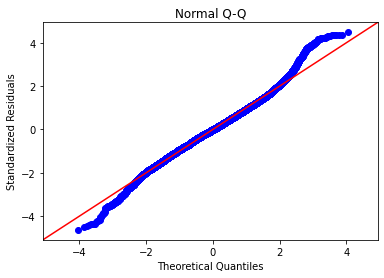

In [35]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 

In [41]:
# # normalized residuals
# model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# # absolute squared normalized residuals
# model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# plot_lm_3 = plt.figure(3)
# plot_lm_3.set_figheight(8)
# plot_lm_3.set_figwidth(12)
# plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
# sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


# plot_lm_3.axes[0].set_title('Scale-Location')
# plot_lm_3.axes[0].set_xlabel('Fitted values')
# plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

In [22]:
#importing model using pickle:
import pickle

In [24]:
#saving model:
pickle.dump(lm,open(r'C:\Users\VISHAL\Web Deployment\IPL Score Prediction\model\linear.pkl','wb'))
# pickle.dump(ridge,open(r'C:\Users\VISHAL\Web Deployment\IPL Score Prediction\model\ridge_model.pkl','wb'))
# pickle.dump(lasso,open(r'C:\Users\VISHAL\Web Deployment\IPL Score Prediction\model\lasso_model.pkl','wb'))
# pickle.dump(lm_model,open(r'C:\Users\VISHAL\Web Deployment\IPL Score Prediction\model\ols_model.pkl','wb'))